In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
import sklearn

In [4]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_match = pd.read_csv('training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv')
data_ipl_2k23_player_team=pd.read_csv('training_dataset/DataSet/Ipl_2023 _cricketers - Players.csv')

In [5]:
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [6]:
data_match.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [7]:
data_ipl_2k23_player_team.head()

,player,Team
0,YBK Jaiswal,RR
1,JC Buttler,RR
2,SV Samson,RR
3,D Padikkal,RR
4,SO Hetmyer,RR


In [8]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

## Ball Dataset Preprocessing

### Data Cleaning

In [9]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [10]:
data_ball.shape

(225954, 17)

In [11]:
data_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [12]:
data_ball.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [13]:
data_ball = data_ball.drop(['extra_type', 'kind', 'fielders_involved', 'batsman_run', 'extras_run', 'isWicketDelivery'], axis = 1)

In [14]:
data_ball.isnull().sum()

ID                   0
innings              0
overs                0
ballnumber           0
batter               0
bowler               0
non-striker          0
total_run            0
non_boundary         0
player_out      214803
BattingTeam          0
dtype: int64

In [15]:
data_ball['player_out'] = data_ball['player_out'].replace([np.nan], ['Not out'])

In [16]:
data_ball.shape

(225954, 11)

In [17]:
data_ball.head(40)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals


In [18]:
ID = list(data_ball['ID'].unique())

In [19]:
data_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            225954 non-null  int64 
 1   innings       225954 non-null  int64 
 2   overs         225954 non-null  int64 
 3   ballnumber    225954 non-null  int64 
 4   batter        225954 non-null  object
 5   bowler        225954 non-null  object
 6   non-striker   225954 non-null  object
 7   total_run     225954 non-null  int64 
 8   non_boundary  225954 non-null  int64 
 9   player_out    225954 non-null  object
 10  BattingTeam   225954 non-null  object
dtypes: int64(6), object(5)
memory usage: 19.0+ MB


In [20]:
data_ball = data_ball.drop(data_ball.loc[data_ball['overs'] > 5].index)

In [21]:
data_ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals


In [22]:
data_ball.isna().sum()

ID              0
innings         0
overs           0
ballnumber      0
batter          0
bowler          0
non-striker     0
total_run       0
non_boundary    0
player_out      0
BattingTeam     0
dtype: int64

## Match Dataset Preprocessing

In [23]:
winning_team=data_match[['ID','WinningTeam']]

In [24]:
winning_team.head()

,ID,WinningTeam
0,1312200,Gujarat Titans
1,1312199,Rajasthan Royals
2,1312198,Royal Challengers Bangalore
3,1312197,Gujarat Titans
4,1304116,Punjab Kings


## Ball dataset with winning team

In [25]:
combined_data = pd.merge(data_ball, winning_team, on = 'ID')

In [26]:
combined_data.isnull().sum()

ID                0
innings           0
overs             0
ballnumber        0
batter            0
bowler            0
non-striker       0
total_run         0
non_boundary      0
player_out        0
BattingTeam       0
WinningTeam     171
dtype: int64

In [27]:
combined_data = combined_data.dropna()

In [28]:
combined_data.head(30)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,non_boundary,player_out,BattingTeam,WinningTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,1,0,Not out,Rajasthan Royals,Gujarat Titans
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,Not out,Rajasthan Royals,Gujarat Titans
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
5,1312200,1,0,6,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,Not out,Rajasthan Royals,Gujarat Titans
6,1312200,1,1,1,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans
7,1312200,1,1,2,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans
8,1312200,1,1,3,JC Buttler,Yash Dayal,YBK Jaiswal,4,0,Not out,Rajasthan Royals,Gujarat Titans
9,1312200,1,1,4,JC Buttler,Yash Dayal,YBK Jaiswal,0,0,Not out,Rajasthan Royals,Gujarat Titans


## Players data preprocessing

In [29]:
batter_bowler_run_data = combined_data[['batter', 'bowler', 'total_run']]

In [30]:
batter_bowler_run_data.head()

,batter,bowler,total_run
0,YBK Jaiswal,Mohammed Shami,0
1,YBK Jaiswal,Mohammed Shami,1
2,JC Buttler,Mohammed Shami,1
3,YBK Jaiswal,Mohammed Shami,0
4,YBK Jaiswal,Mohammed Shami,0


In [31]:
batter_bowler_run_data.shape

(70911, 3)

In [32]:
X = batter_bowler_run_data.iloc[:, :-1]
y = batter_bowler_run_data.iloc[:, -1]

In [33]:
import seaborn as sns

In [34]:
y.unique()

array([0, 1, 4, 6, 3, 2, 5, 7], dtype=int64)

<Axes: xlabel='total_run', ylabel='count'>

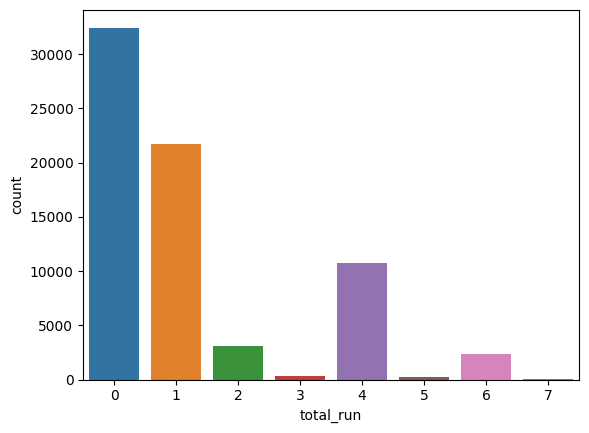

In [35]:
sns.countplot(x = y)

In [36]:
X['batter'].nunique()

325

In [37]:
X['bowler'].nunique()

381

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# Encoding
le = LabelEncoder()
X['batter_encoded'] = le.fit_transform(X['batter'])
X['bowler_encoded'] = le.fit_transform(X['bowler'])

In [40]:
X.head()

,batter,bowler,batter_encoded,bowler_encoded
0,YBK Jaiswal,Mohammed Shami,318,228
1,YBK Jaiswal,Mohammed Shami,318,228
2,JC Buttler,Mohammed Shami,115,228
3,YBK Jaiswal,Mohammed Shami,318,228
4,YBK Jaiswal,Mohammed Shami,318,228


In [41]:
X_le = X[['batter_encoded', 'bowler_encoded']]

In [42]:
X_le.head()

,batter_encoded,bowler_encoded
0,318,228
1,318,228
2,115,228
3,318,228
4,318,228


### Test and train dataset from players data

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size = 0.2, random_state = 0)

## Players Data Modelling

### Logistic Regression Classifier

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [49]:
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

y_pred = logistic_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63      6530
           1       0.00      0.00      0.00      4330
           2       0.00      0.00      0.00       587
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00      2147
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00       480
           7       0.00      0.00      0.00         1

    accuracy                           0.46     14183
   macro avg       0.06      0.12      0.08     14183
weighted avg       0.21      0.46      0.29     14183



### Decision tree classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train, y_train)

y_pred = dtc_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.75      0.58      6530
           1       0.34      0.24      0.28      4330
           2       0.05      0.01      0.01       587
           3       0.00      0.00      0.00        72
           4       0.15      0.04      0.07      2147
           5       0.00      0.00      0.00        36
           6       0.05      0.01      0.01       480
           7       0.00      0.00      0.00         1

    accuracy                           0.42     14183
   macro avg       0.13      0.13      0.12     14183
weighted avg       0.35      0.42      0.36     14183



In [56]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc_clf,
                               param_grid = param_grid,
                               cv = 10)

grid_search_dtc.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.46      1.00      0.63      6530
           1       0.33      0.00      0.00      4330
           2       0.00      0.00      0.00       587
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00      2147
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00       480
           7       0.00      0.00      0.00         1

    accuracy                           0.46     14183
   macro avg       0.10      0.13      0.08     14183
weighted avg       0.31      0.46      0.29     14183



In [71]:
model = grid_search_dtc.best_estimator_
y_pred = grid_search_dtc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      1.00      0.63      6530
           1       0.33      0.00      0.00      4330
           2       0.00      0.00      0.00       587
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00      2147
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00       480
           7       0.00      0.00      0.00         1

    accuracy                           0.46     14183
   macro avg       0.10      0.13      0.08     14183
weighted avg       0.31      0.46      0.29     14183



In [72]:
grid_search_dtc.score(X_test, y_test)

0.46033984347458223

In [73]:
grid_search_dtc.score(X_train, y_train)

0.45702298688478354

In [70]:
grid_search_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

### Multilayer perceptron classifier

In [78]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [79]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

In [80]:
mlpc_clf  = MLPClassifier()

mlpc_clf.fit(X_train, y_train)

y_pred = mlpc_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44      6530
           1       0.30      0.58      0.40      4330
           2       0.00      0.00      0.00       587
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00      2147
           5       0.00      0.00      0.00        36
           6       0.00      0.00      0.00       480
           7       0.00      0.00      0.00         1

    accuracy                           0.37     14183
   macro avg       0.10      0.12      0.10     14183
weighted avg       0.30      0.37      0.32     14183



In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

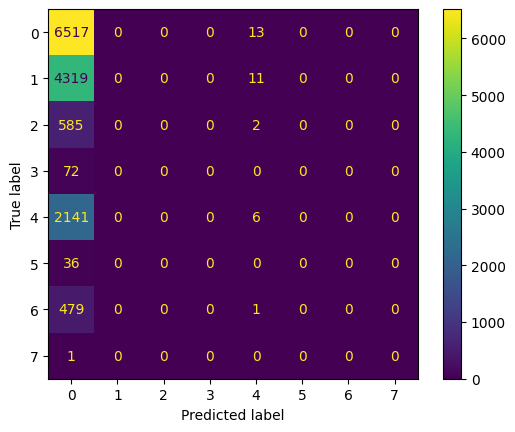

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [82]:
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

grid_search_mlpc = GridSearchCV(mlpc_clf,
                               param_grid = param_grid,
                               cv = cv)

grid_search_mlpc.fit(X_train, y_train)

In [ ]:
model = grid_search_mlpc.best_estimator_
y_pred = grid_search_mlpc.predict(X_test)

print(classification_report(y_test, y_pred))